In [3]:
# 노브툭 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress Deprecation and incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [5]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [6]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [131]:
# 판다스로 선다형 객과식 문제에 대한 응답을 가져옴.
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding = 'ISO-8859-1', low_memory = False)
mcq.shape

(16716, 228)

In [11]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [12]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

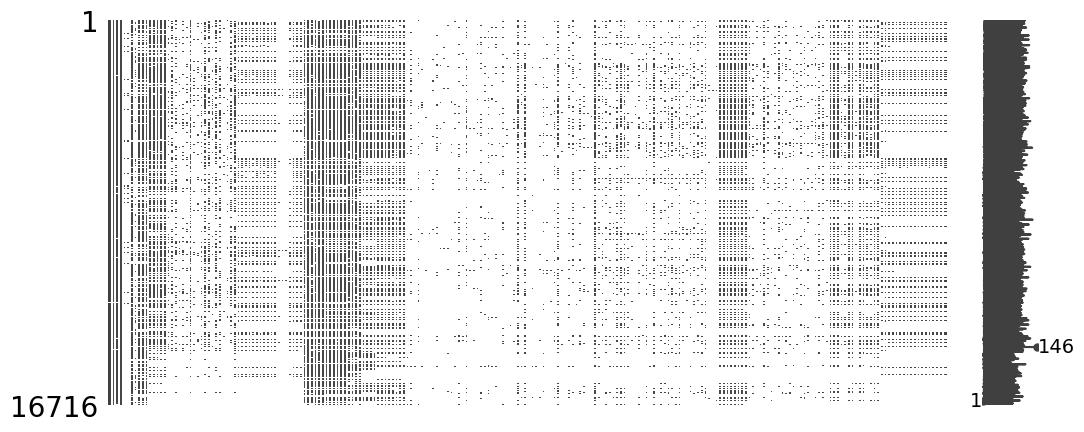

In [17]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프로만으로는 내용을 파악하기 어렵다.

import missingno as msno

msno.matrix(mcq, figsize = (12,5))

In [20]:
mcq.isnull().sum().sum()

2874279

* 16,716명의 데이터와 228개의 선다형 객관식 문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음.

## 설문 통계

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

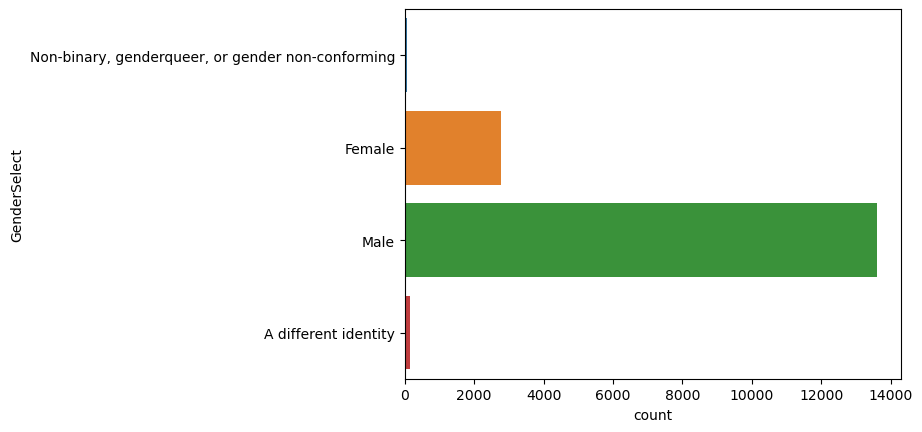

In [22]:
# 성별
sns.countplot(y = 'GenderSelect', data = mcq)

* 여성보다는 남성의 비율이 훨씬 높은 편이다.

In [32]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# 'country'컬럼을 인덱스로 지정해주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정 해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()를 해준다.
con_df = con_df.reset_index().drop('index', axis = 1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [33]:
# 연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

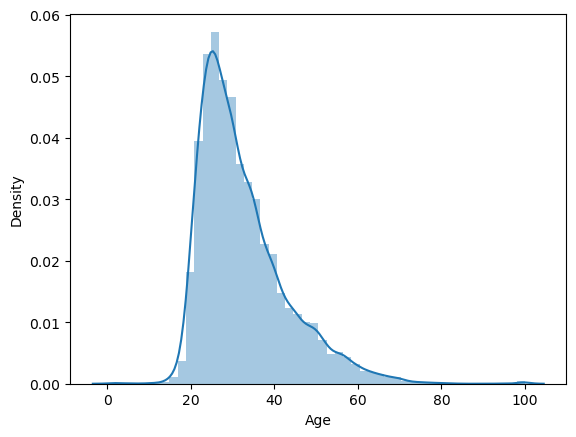

In [34]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

응답자 대부분이 어리며, 20대부터 급격하게 늘어나며 30대가 가장 많다. 평균 나이는 32세이다.

### 학력

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

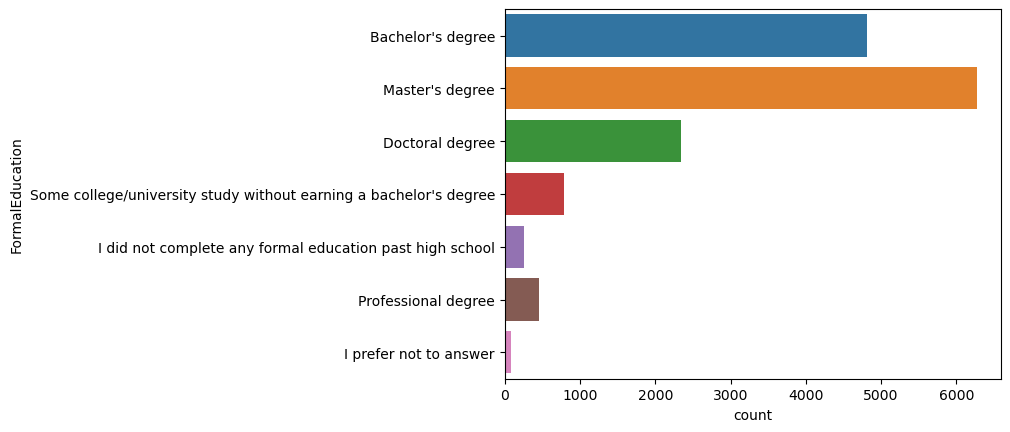

In [35]:
sns.countplot(y = 'FormalEducation', data = mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사 학위를 가지고 있는 사람들도 많다.

### 전공 

In [43]:
# value_counts를 사용하면 그룹화된 데이터의 카운트 값을 보여준다.
# normalize = True 옵션을 사용하면, 해당 데이터가 전체 데이터에서 어느 정도 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))

mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 전기 공장 순이다.

<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

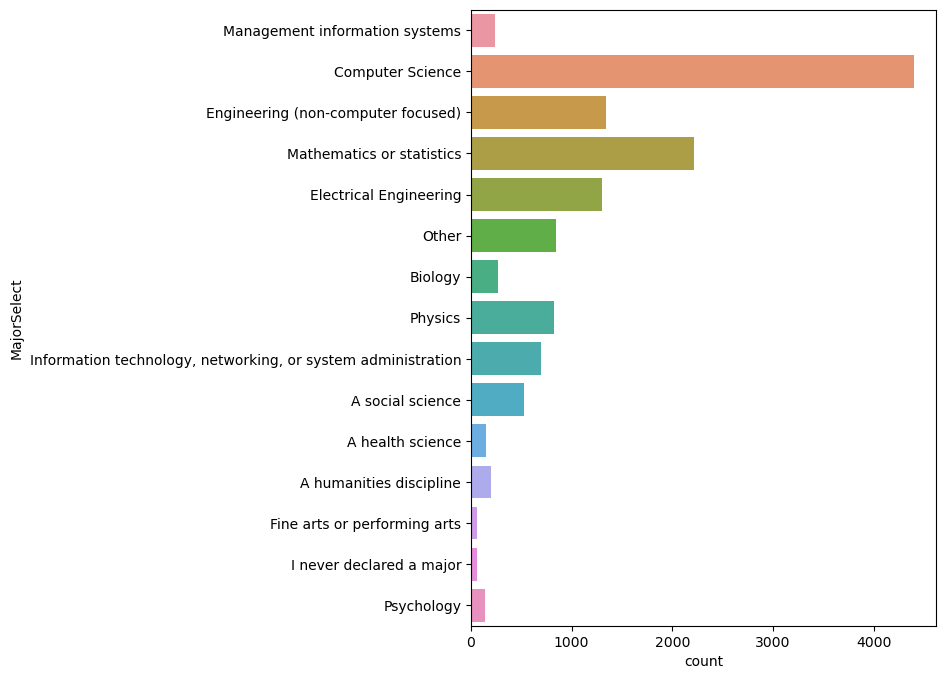

In [44]:
# 재학 중인 사람들의 전공 현황
plt.figure(figsize = (6,8))
sns.countplot(y = 'MajorSelect', data = mcq)

### 취업 여부

In [46]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize = True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index = True, right_index = True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

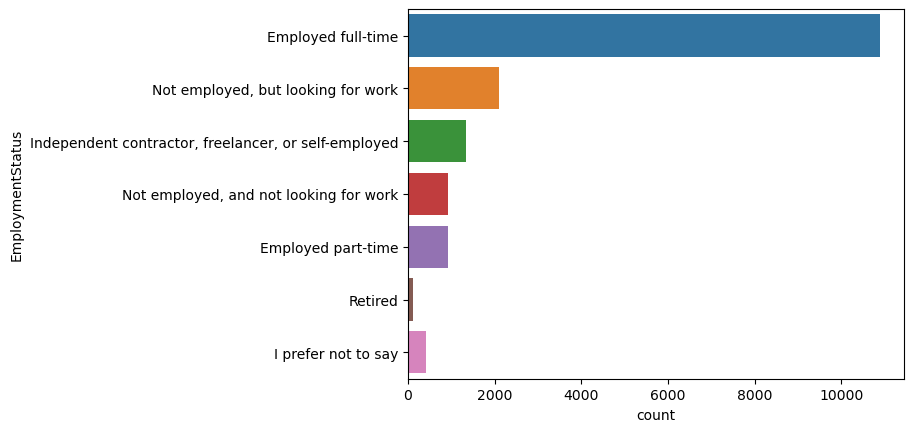

In [47]:
sns.countplot(y = 'EmploymentStatus', data = mcq)

응답자의 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%를 차지하고 있다.

### 프로그래밍 경험

* Tenure항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

<AxesSubplot:xlabel='count', ylabel='Tenure'>

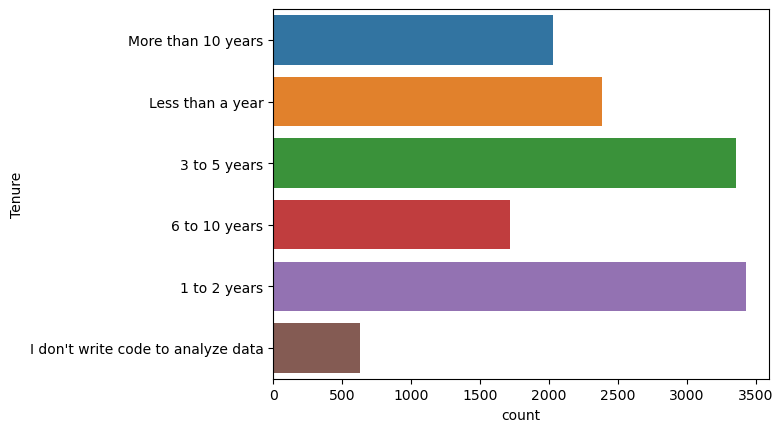

In [48]:
sns.countplot(y='Tenure', data = mcq)

In [57]:
korea

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
356,Male,South Korea,27.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Female,South Korea,36.0,Employed full-time,NaN,NaN,No,Yes,Researcher,Fine,...,Very Important,Very Important,Very Important,Somewhat important,Somewhat important,Very Important,Somewhat important,Not important,Not important,Not important
491,Male,South Korea,34.0,Employed part-time,NaN,NaN,Yes,NaN,Scientist/Researcher,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Male,South Korea,53.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Male,South Korea,35.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,Very Important,Not important,Not important,Not important,Somewhat important,Somewhat important,Very Important,Not important,Somewhat important,Not important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16466,Male,South Korea,38.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16540,Male,South Korea,24.0,"Not employed, and not looking for work",No,"Yes, I'm focused on learning mostly data scien...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16583,Male,South Korea,37.0,Employed full-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16671,Male,South Korea,34.0,Employed full-time,NaN,NaN,No,Yes,Other,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The number of interviewees in Korea: 194


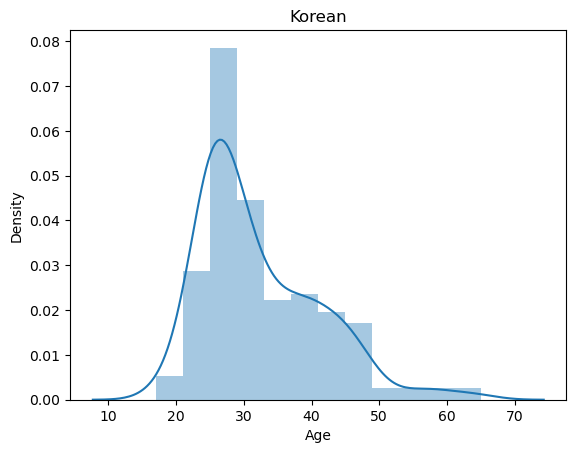

In [53]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [54]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'korean')

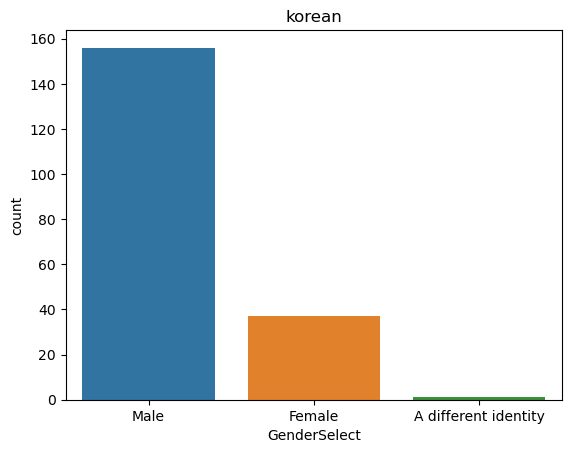

In [59]:
sns.countplot(x='GenderSelect', data = korea)
plt.title('korean')

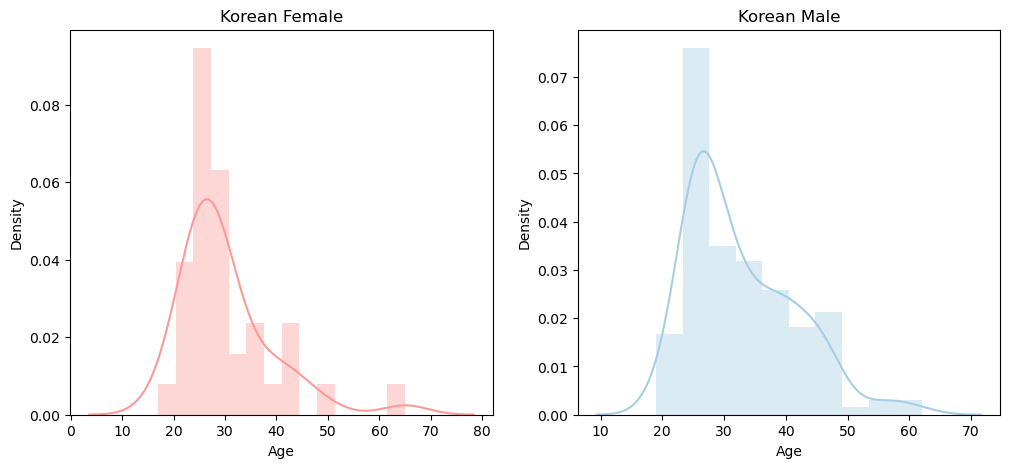

In [68]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist = False, color = sns.color_palette('Paired')[4], ax = ax1)
ax1.set_title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist = False, color = sns.color_palette('Paired')[0], ax = ax2)
ax2.title('Korean Male')
plt.show()

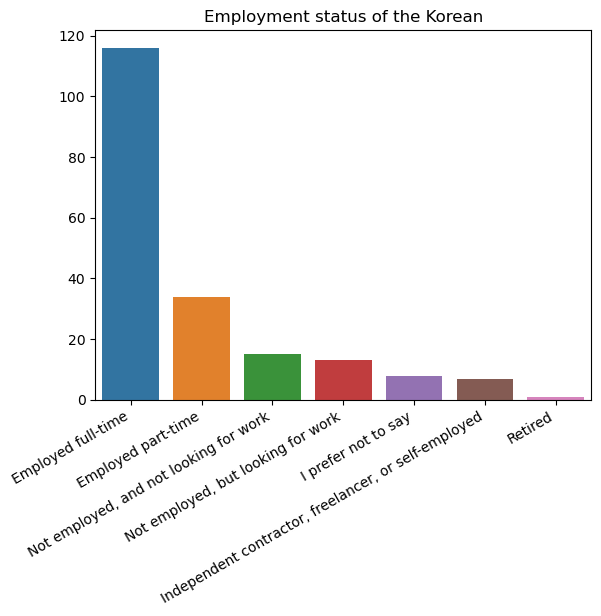

In [70]:
sns.barplot(x=korea['EmploymentStatus'].unique(),y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation = 30, ha = 'right')
plt.title('Employment status of the Korean')
plt.ylabel('')
plt.show()

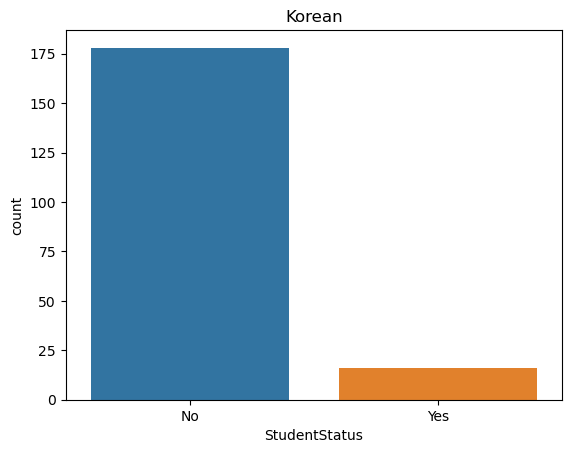

In [71]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x = 'StudentStatus', data = korea)
plt.title('Korean')
plt.show()

In [73]:
full_time = mcq.loc[mcq['EmploymentStatus'] == 'Employed full-time']
print(full_time.shape)
looking_for_job = mcq.loc[mcq['EmploymentStatus'] == 'Not employed, but looking for work']
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


## 자주 묻는 질문 FAQ

* 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

### Q. Pyhton과 R 중 어떤 언어를 배워야 할까요?

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

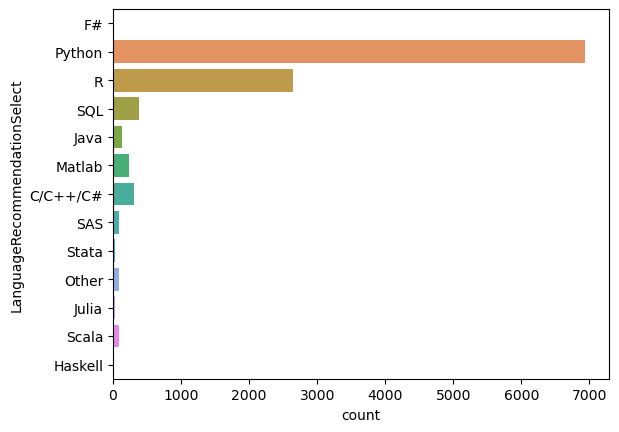

In [74]:
sns.countplot(y = 'LanguageRecommendationSelect', data = mcq)

파이썬을 명확하게 선호하고 있는 것으로 보여지며, 전문자와 강사들이 선호하는 언어를 알아본다.

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

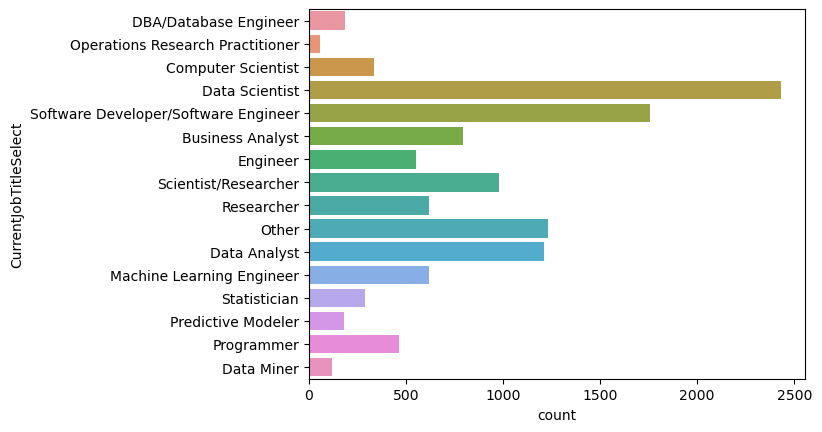

In [75]:
# 현재 하고 있는 일
sns.countplot(y = mcq['CurrentJobTitleSelect'])

In [76]:
# 현재하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

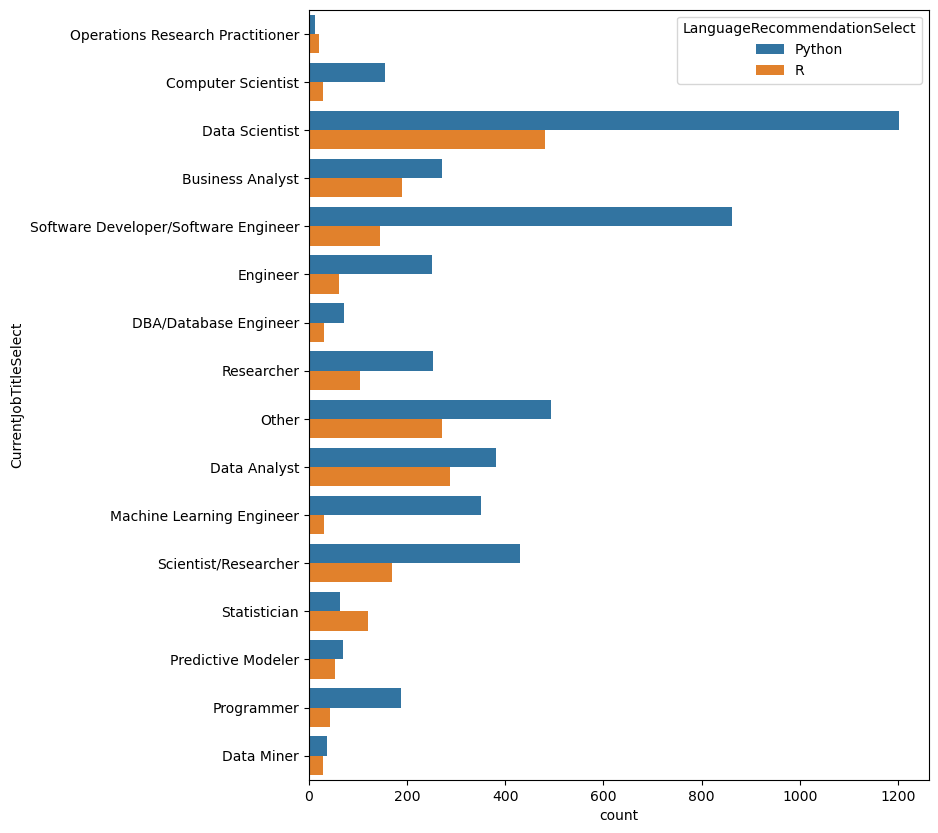

In [78]:
# 현재하고 있는 일에 대해 응답한 사람들 중 Pyhton과 R을 사용하는 사람
# 응답자들이 실제 업무에 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect'] == 'Python') | 
                                                      (mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize = (8,10))
sns.countplot(y = 'CurrentJobTitleSelect', hue = 'LanguageRecommendationSelect', data = data)

대부분의 직군에서 Python을 선호하는 것으로 나타났으며, Data Scientist나 Softwater Developer/Engineer에서 그 경향이 두드러졌다. Operations Research Practitioner와 Statistician은 R을 더 선호하는 것으로 나타났다.

## Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?

* 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

### 데이터 사이언스 툴

In [84]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize = True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index = True, right_index = True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

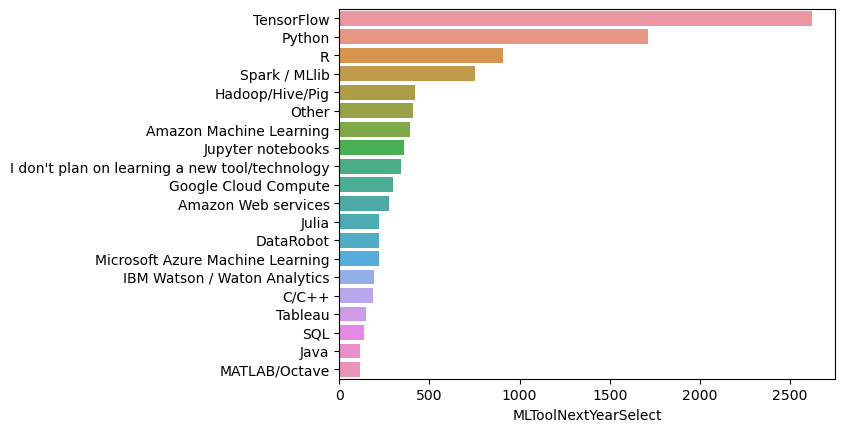

In [85]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y = data.index, x = data)

구글의 딥러닝 프레임워크 텐서플로우가 23.8%로 가장 많은 관심을 받을 것이라고 응답했다. 그리고 Python이 15.6%, R은 8.3%로 나타났다

클라우드는 Amazon ML, GCP, MS Azure ML 순으로 응답하였다.

### 데이터사이언스 방법 (Data Science Methods) 

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

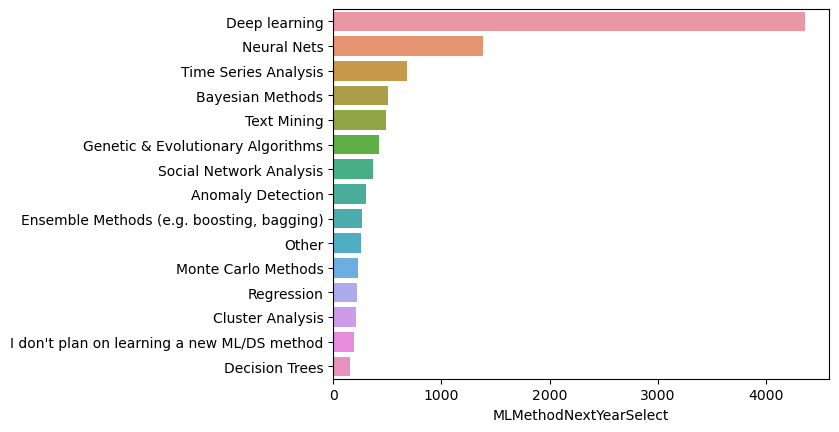

In [86]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y = data.index, x = data)

응답에 대한 통계를 보면 딥러닝이 가장 인기가 있을 것으로 응답하였고, 그 다음으로 뉴럴네트워크, 시계열 분석, 베이지안 방법, 텍스트 마이닝으로 나타났다. 

## Q3. 어디에서 데이터 사이언스를 배워야 할까요?

In [132]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']), axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'platform' 

<AxesSubplot:xlabel='platform'>

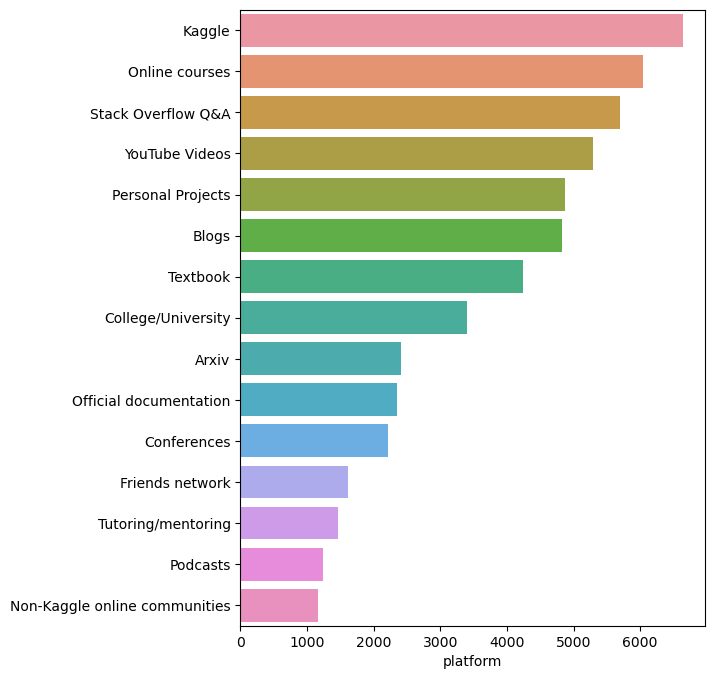

In [133]:
plt.figure(figsize = (6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y = data.index, x = data)

* Kaggle은 응답자들 사이에서 가장 인기있는 학습 플랫폼으로 조사되었음.
* 하지만 이 설문을 조사한 곳이 Kaggle이기 때문에 응답이 편향되었을 수 있음.
* Kaggle 다음으로는 온라인 학습, 스택오버플로우, 유튜브 등으로 응답하였고, 그 순위는 교과서나 대학이라는 응답보다 많았다.

In [98]:
# 설문 내용과 누구에게 물어봤는지 확인
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [103]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness')!=-1]
use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

<AxesSubplot:>

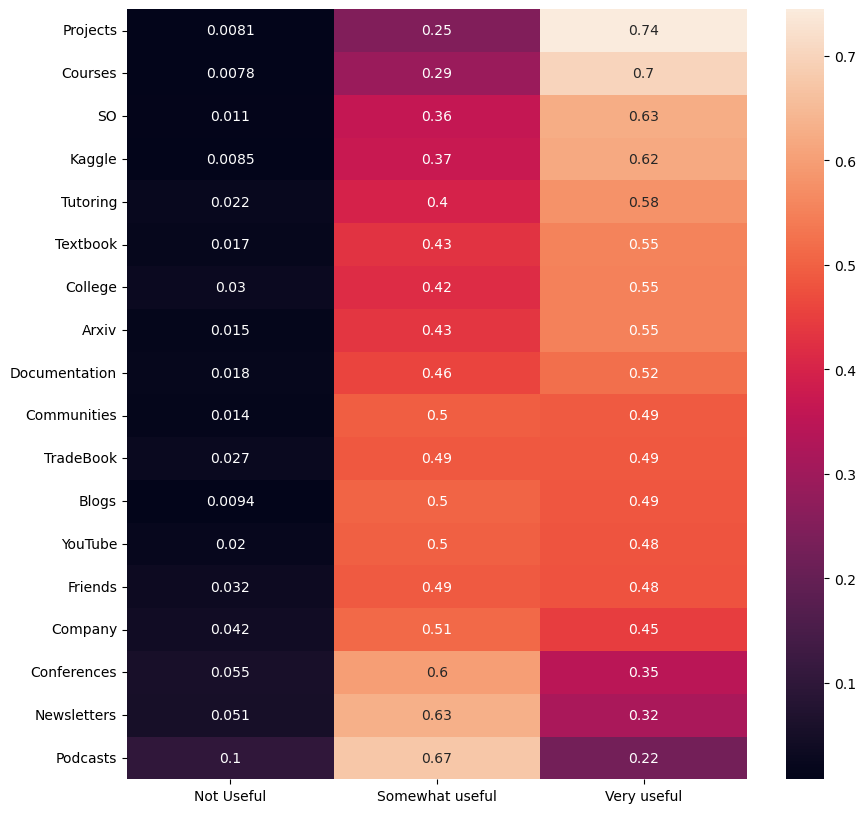

In [105]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a
    
fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending = False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관 관계를 그려본다.
plt.figure(figsize = (10,10))
sns.heatmap(fdf.sort_values('Very useful', ascending = False), annot = True)

<AxesSubplot:title={'center':'Usefullness of Learning Platforms'}>

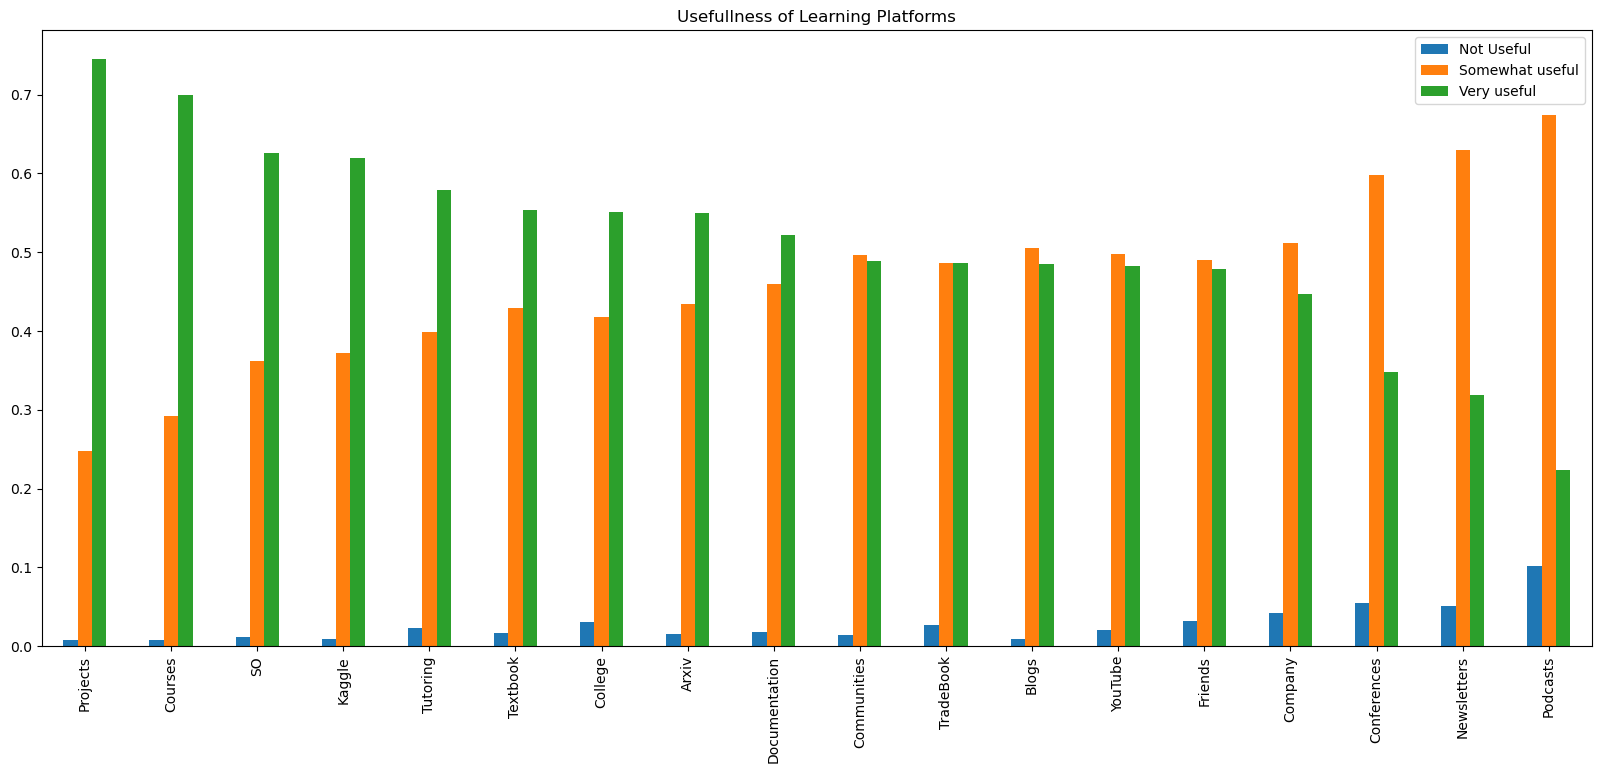

In [106]:
# 유용함의 정도를 각 플랫폼별로 그룹화해서 본다.
fdf.plot(kind = 'bar', figsize = (20,8), title = 'Usefullness of Learning Platforms')

실제 프로젝트를 해보는 것에 대해 74.7%의 응답자들이 유용하다고 응답하였다. 관련 course, SO, kaggle의 순으로 유용하다는 응답을 하였다. 반면, 팟캐스트, 신문, 컨퍼런스는 유용하지 않다는 답변이 많았지만, 때때로 유용하다는 의견도 있었다.

In [107]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory')!=-1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [108]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
    
# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

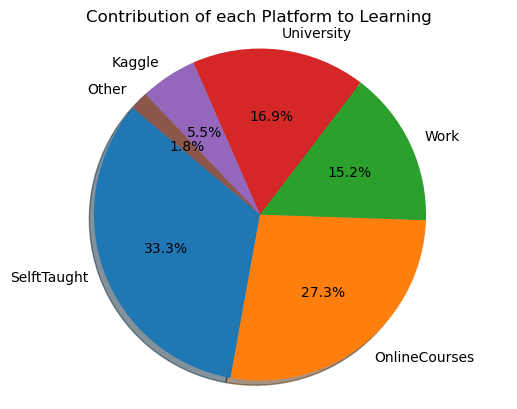

In [109]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels = cdf.index, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

개인프로젝트를 해보는 것이 가장 도움이 되었고, 그 다음으로는 온라인 코스, 대학, 업무 순으로 나타났다. 

### Q4. 데이터 사이언스를 위해 높은 사양의 컴퓨터가 필요한가?

In [112]:
# 설문 내용과 누구에게 물어보았는지 확인
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [113]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [134]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'hardware'

In [135]:
s = s[s!= 'nan']

In [136]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장 많았고, 랩탑(클라우드 서비스 AWS, Azure, GCE), 게이밍 랩탑의 순으로 나타났다.

### Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

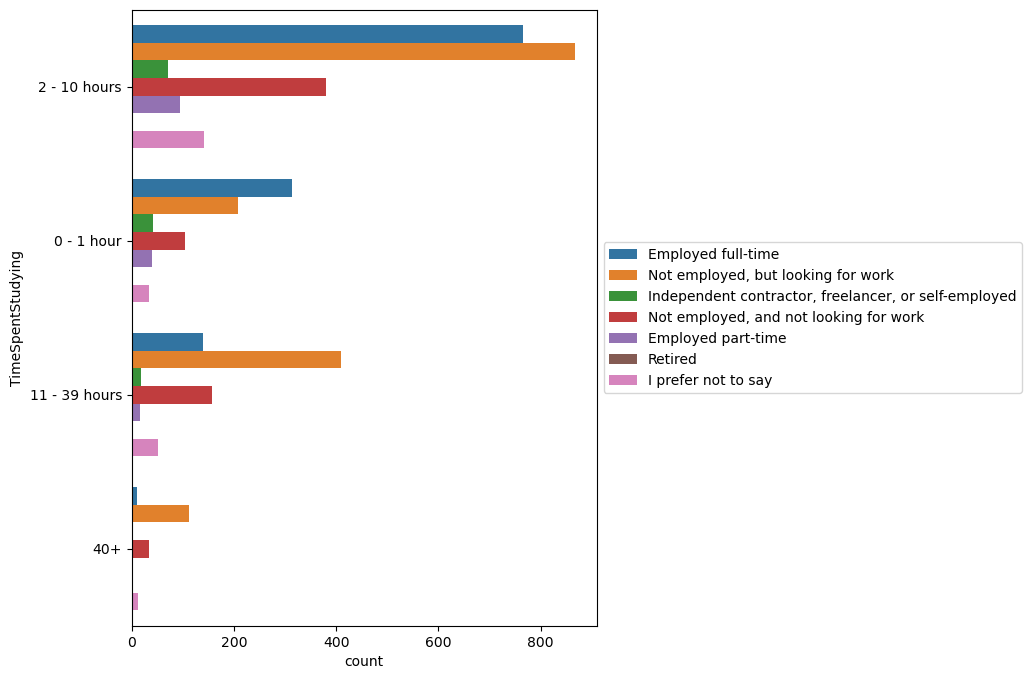

In [138]:
plt.figure(figsize = (6, 8))
sns.countplot(y = 'TimeSpentStudying', data = mcq, hue = 'EmploymentStatus').legend(loc = 'center left', bbox_to_anchor = (1,0.5))

풀타임으로 일하는 사람들의 대부분은 2~10시간 정도를 공부하는 시간에 할애하는 것으로 응답하였으며, 현재 구직중인 사람들이 11시간 이상의 공부 시간을 할애하는 것으로 응답하였다.

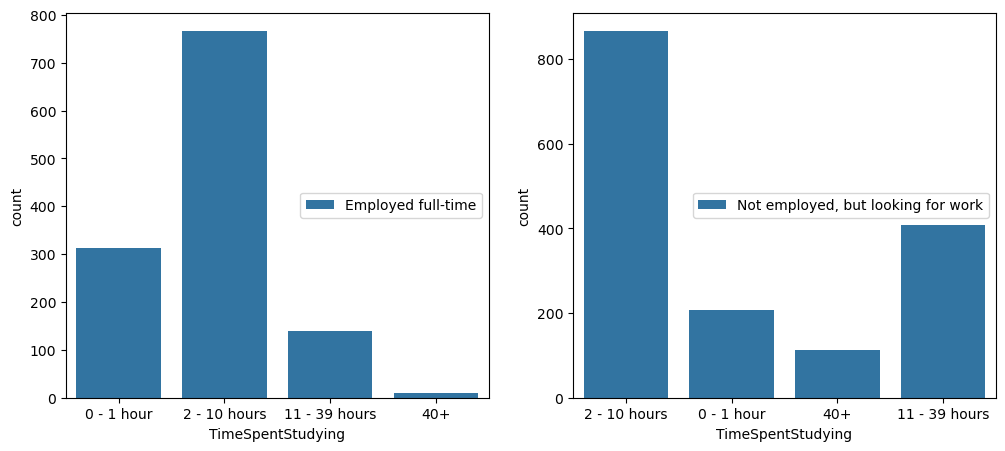

In [141]:
figure, (ax1, ax2) = plt.subplots(ncols = 2)

figure.set_size_inches(12,5)
sns.countplot(x = 'TimeSpentStudying', data = full_time, hue = 'EmploymentStatus', ax=ax1).legend(loc='center right', bbox_to_anchor = (1,0.5))
sns.countplot(x = 'TimeSpentStudying', data = looking_for_job, hue = 'EmploymentStatus', ax=ax2).legend(loc='center right', bbox_to_anchor = (1,0.5))

### Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할 만한 것이 있는지?

In [143]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [145]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']), axis = 1).stack().reset_index(level=1, drop= True)
s.name = 'platform'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platform, dtype: object

In [146]:
s = s[s!='nan'].value_counts().head(20)

<AxesSubplot:title={'center':'Most Popular Blogs and Podcasts'}, xlabel='platform'>

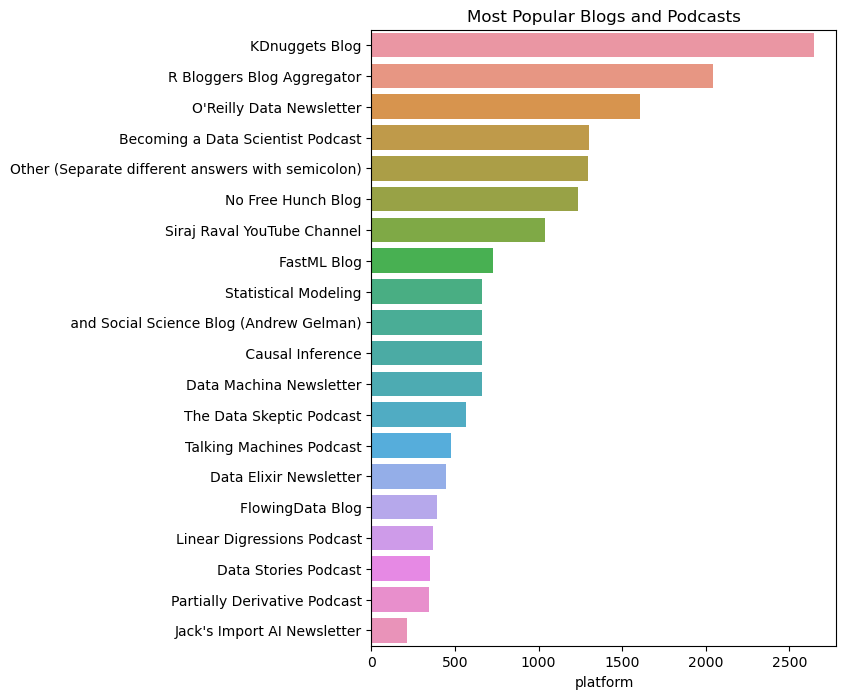

In [148]:
plt.figure(figsize = (6,8))
plt.title('Most Popular Blogs and Podcasts')
sns.barplot(y=s.index, x=s)

KDNuggets Blog, R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter가 가장 유용하다고 ㅍ투표를 받았다. 데이터 사이언스 되기라는 팟캐스트도 유명한 듯하다.
* Machine Learning, Data Science, Big Data, Analytics (https://www.kdnuggets.com/websites/blogs.html)
* Becoming a Data Scientist (https://www.youtube.com/results?search_query=becoming+a+data+scientist)
* Siraj Raval (https://www.youtube.com/@SirajRaval)

In [149]:
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [151]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']), axis = 1).stack().reset_index(level=1, drop= True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [152]:
t = t[t!='nan'].value_counts()

<AxesSubplot:title={'center':'Most Popular Course Platforms'}, xlabel='courses'>

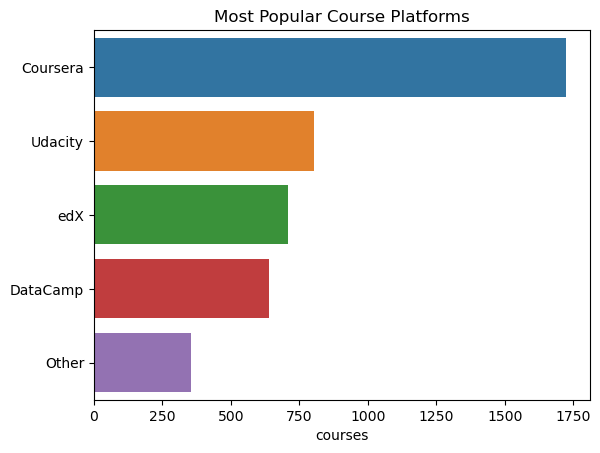

In [153]:
plt.title('Most Popular Course Platforms')
sns.barplot(y = t.index, x=t)

### Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [154]:
job_featrues = [x for x in mcq.columns if x.find('JobSkillImportance')!= -1 and x.find('JobSkillImportanceOther')]
job_featrues

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [156]:
jdf = {}
for feature in job_featrues:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a
    
jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [159]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


<AxesSubplot:>

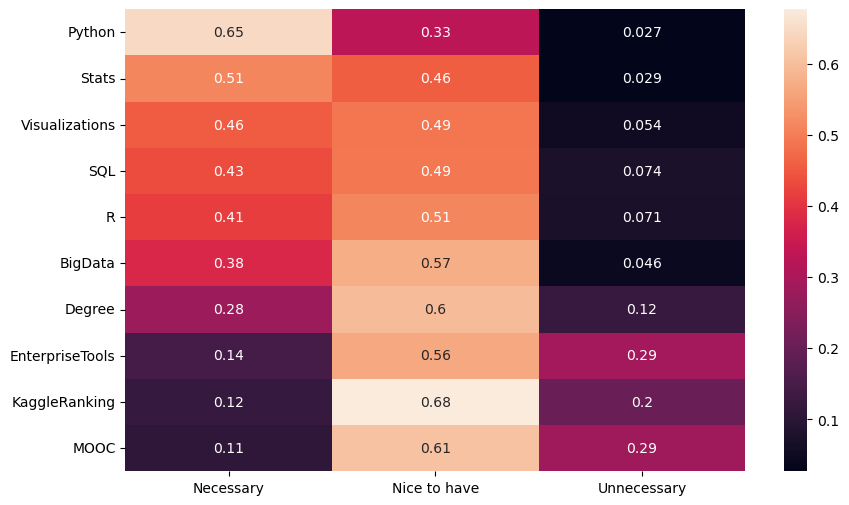

In [160]:
plt.figure(figsize = (10,6))
sns.heatmap(jdf.sort_values('Necessary', ascending = False), annot = True)

<AxesSubplot:title={'center':'Skill Importance in Data Science Jobs'}>

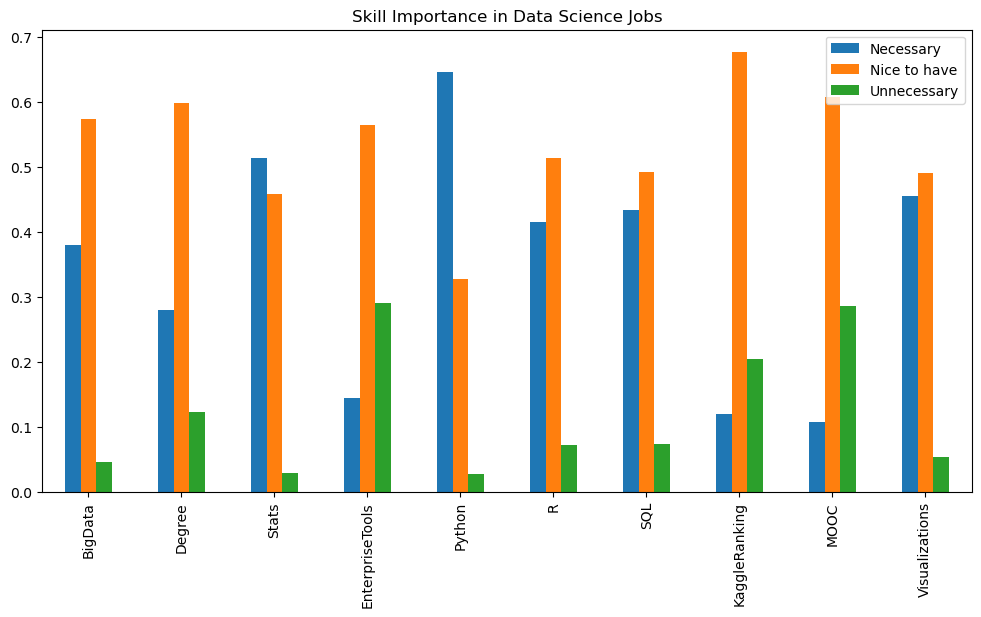

In [161]:
jdf.plot(kind = 'bar', figsize = (12,6), title = 'Skill Importance in Data Science Jobs')

꼭 필요한 것은 Python, 통계학, 시각화, SQL, R순이었다. 갖고 있으면 좋은 것으로는 Kaggle ranking, MOOC, 학위 등이 있었다.

### Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [162]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [170]:
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-','')

# 환율 계산을 위한 정보 가져오기
rates = pd.read_csv('data/conversionRates.csv')
rates.drop('Unnamed: 0', axis = 1, inplace = True)

salary = mcq[['CompensationAmount','CompensationCurrency', 'GenderSelect', 'Country', 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on = 'CompensationCurrency', right_on = 'originCountry', how = 'left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [172]:
print('Maximum Salary in USD $', salary['Salary'].dropna().astype(int).max())
print('minimum Salary in USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary in USD $', salary['Salary'].dropna().astype(int).median())

Maximum Salary in USD $ 28297400000
minimum Salary in USD $ 0
Median Salary in USD $ 53812.0


가장 큰 수치는 여러 국가들의 GDP보다 크다고 한다. 가짜 응답이며, 평균 급여는 USD 53,812이다. 그래프를 좀더 잘 표면하기 위해 50만불 미만의 데이터만 distplot으로 그려봣다.

Text(0.5, 1.0, 'Salary Distribution')

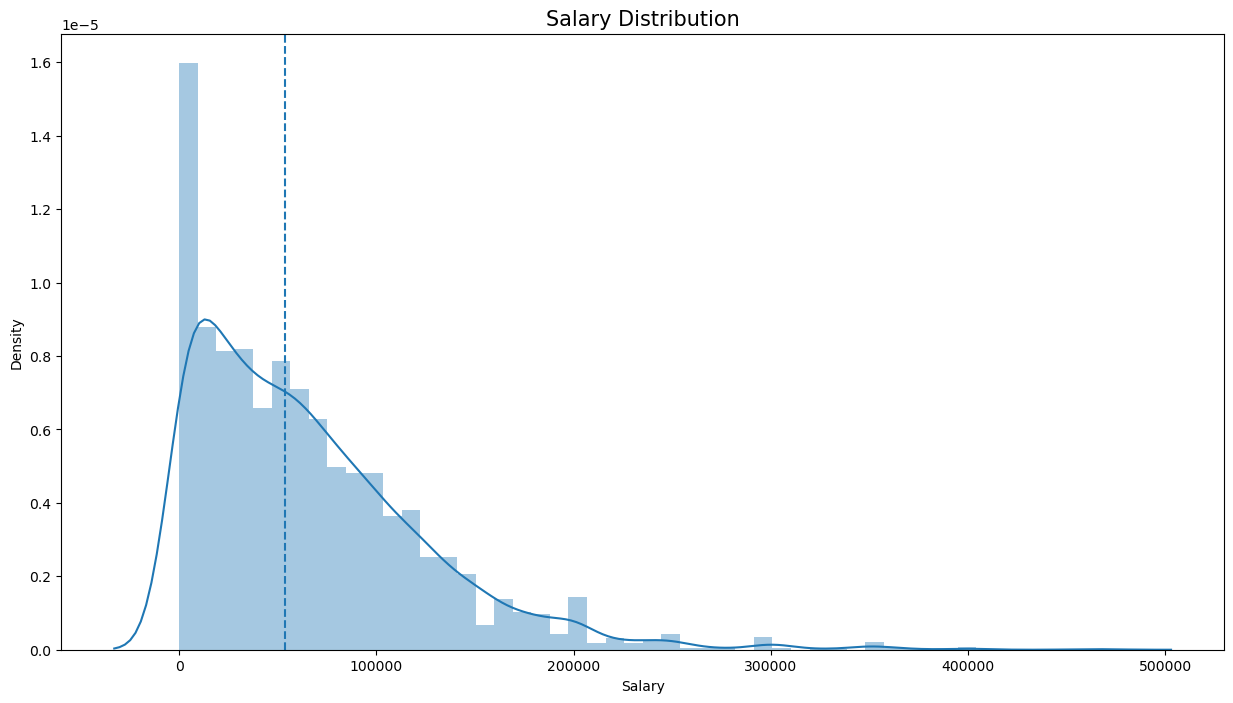

In [174]:
plt.subplots(figsize = (15,8))
salary = salary[salary['Salary'] < 500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle = 'dashed')  # 중간에 선을 긋는 명렁어
plt.title('Salary Distribution', size = 15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

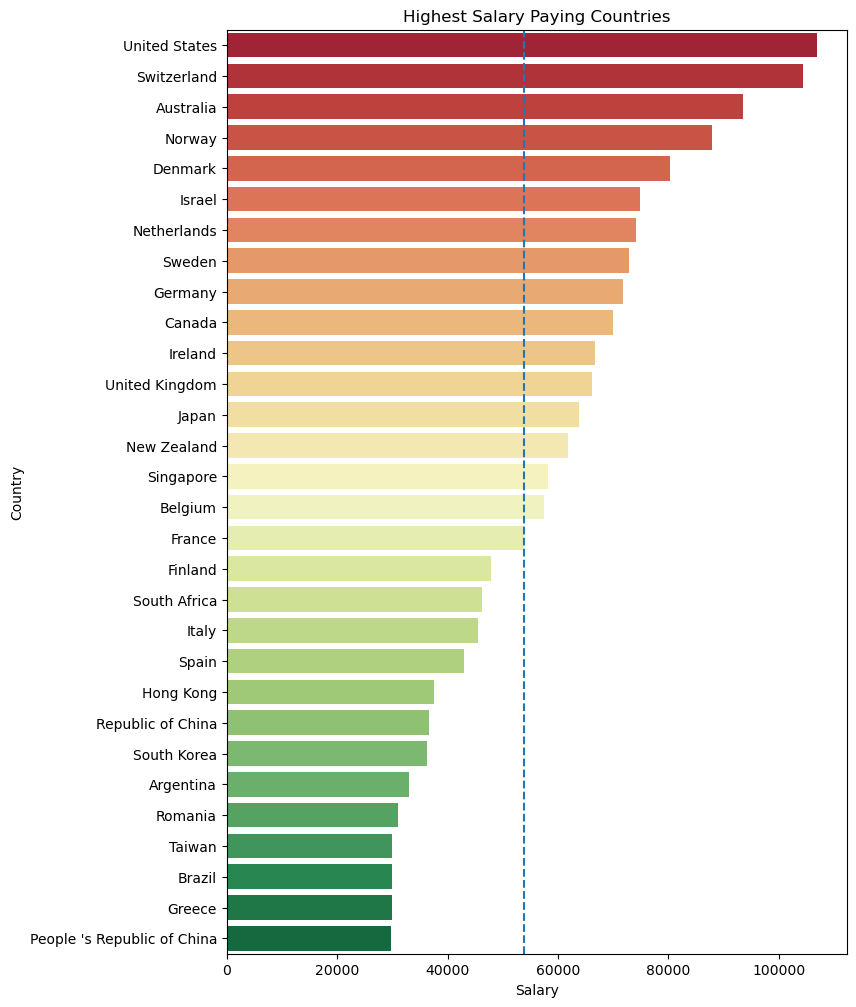

In [179]:
plt.subplots(figsize = (8,12))

sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending = False)[:30].to_frame()

sns.barplot('Salary', sal_coun.index, data = sal_coun, palette = 'RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle = 'dashed')
plt.title('Highest Salary Paying Countries')

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

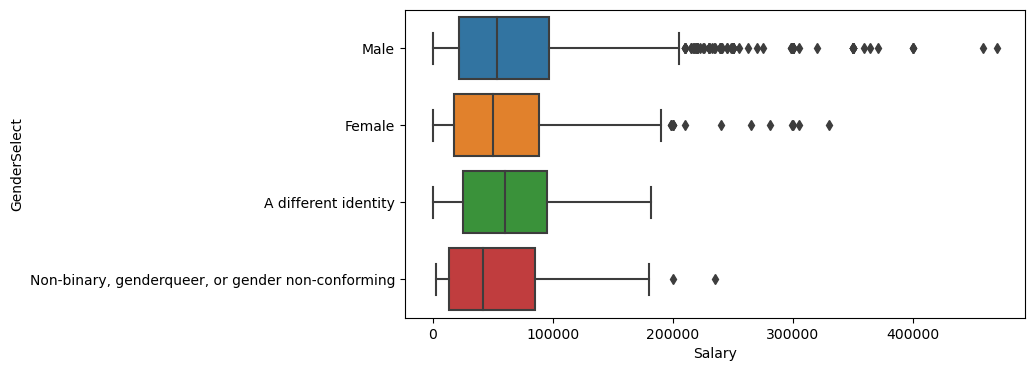

In [181]:
plt.subplots(figsize = (8,4))
sns.boxplot(y = 'GenderSelect', x = 'Salary', data = salary)

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

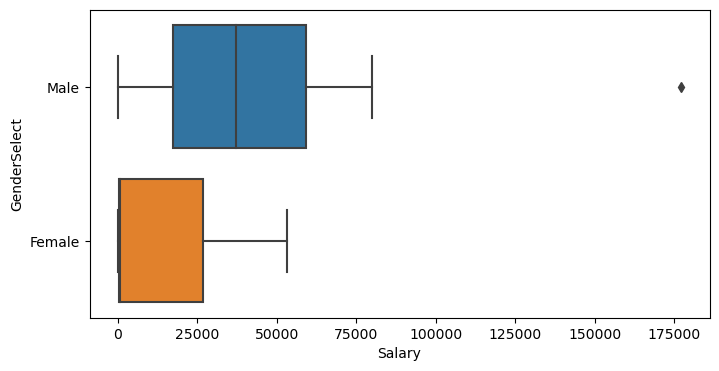

In [182]:
salary_korea = salary.loc[salary['Country'] == 'South Korea']
plt.subplots(figsize = (8,4))
sns.boxplot(y = 'GenderSelect', x = 'Salary', data=salary_korea)

In [183]:
salary_korea.shape

(26, 8)

In [184]:
salary_korea[salary_korea['GenderSelect']=='Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [185]:
salary_korea_male = salary_korea[salary_korea['GenderSelect']=='Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [186]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


### Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [187]:
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))

In [188]:
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']), axis = 1).stack().reset_index(level=1, drop= True)
q.name = 'courses'

In [189]:
q = q[q!='nan'].value_counts()

In [190]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


<AxesSubplot:title={'center':'Most Popular Dataset platforms'}, xlabel='courses'>

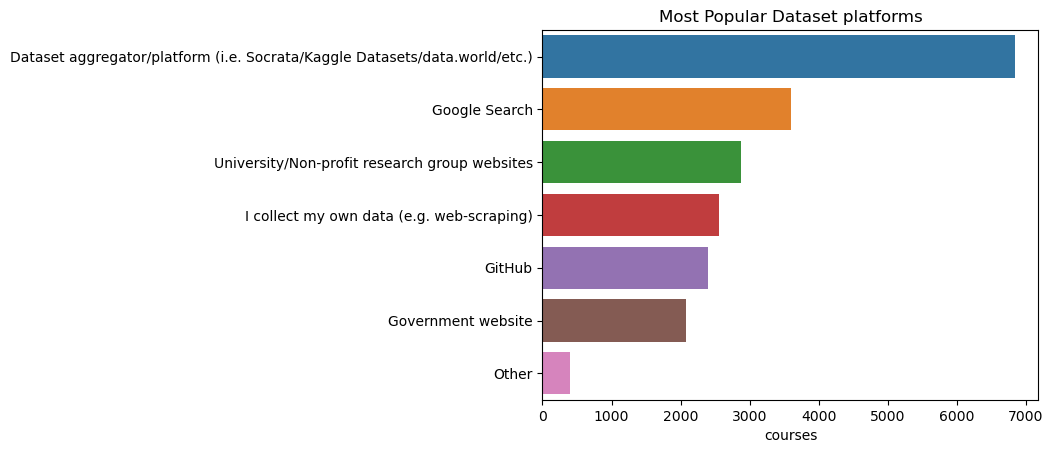

In [191]:
plt.title('Most Popular Dataset platforms')
sns.barplot(y=q.index, x=q)

In [193]:
# 주관식 응답을 읽어온다.
ff = pd.read_csv('data/freeformResponses.csv', encoding = 'ISO-8859-1', low_memory = False)
ff.shape

(16716, 62)

In [197]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

개인프로젝트에서 공개 된 데이터셋을 다루는데 가장 어려운 점은?

In [198]:
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
-,9
Size,9


### Q11. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

In [200]:
time_features = [x for x in mcq.columns if x.find('Time') != -1][4:10]
time_features

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



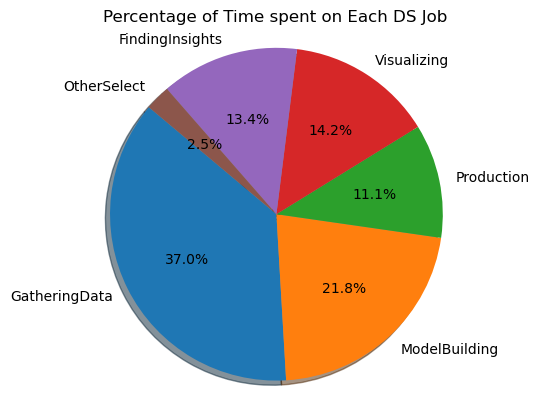

In [202]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()
    
tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels = tdf.index, autopct='%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Percentage of Time spent on Each DS Job')
plt.show()

데이터를 수집하는 일이 37%로 가장 많은 비중을 차지하고, 그 다음에는 모델 구축, 시각화의 순으로 응답하였다.

### Q11. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요? 

In [203]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [209]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') != -1]

<AxesSubplot:>

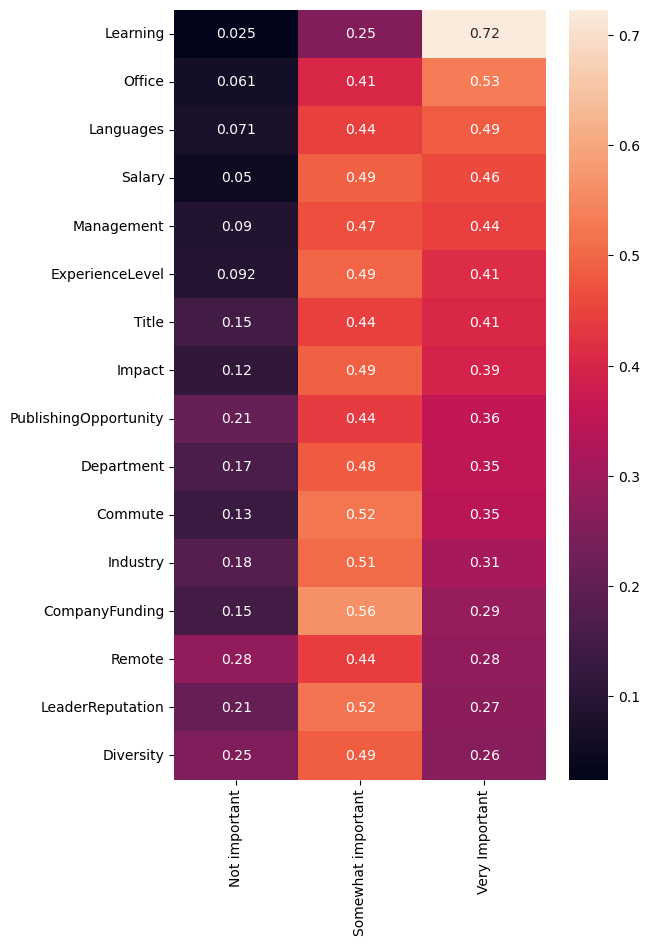

In [211]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a
    
jfdf = pd.DataFrame(jfdf).transpose()

jfdf
plt.figure(figsize=(6,10))
sns.heatmap(jfdf.sort_values('Very Important', ascending = False),annot = True)

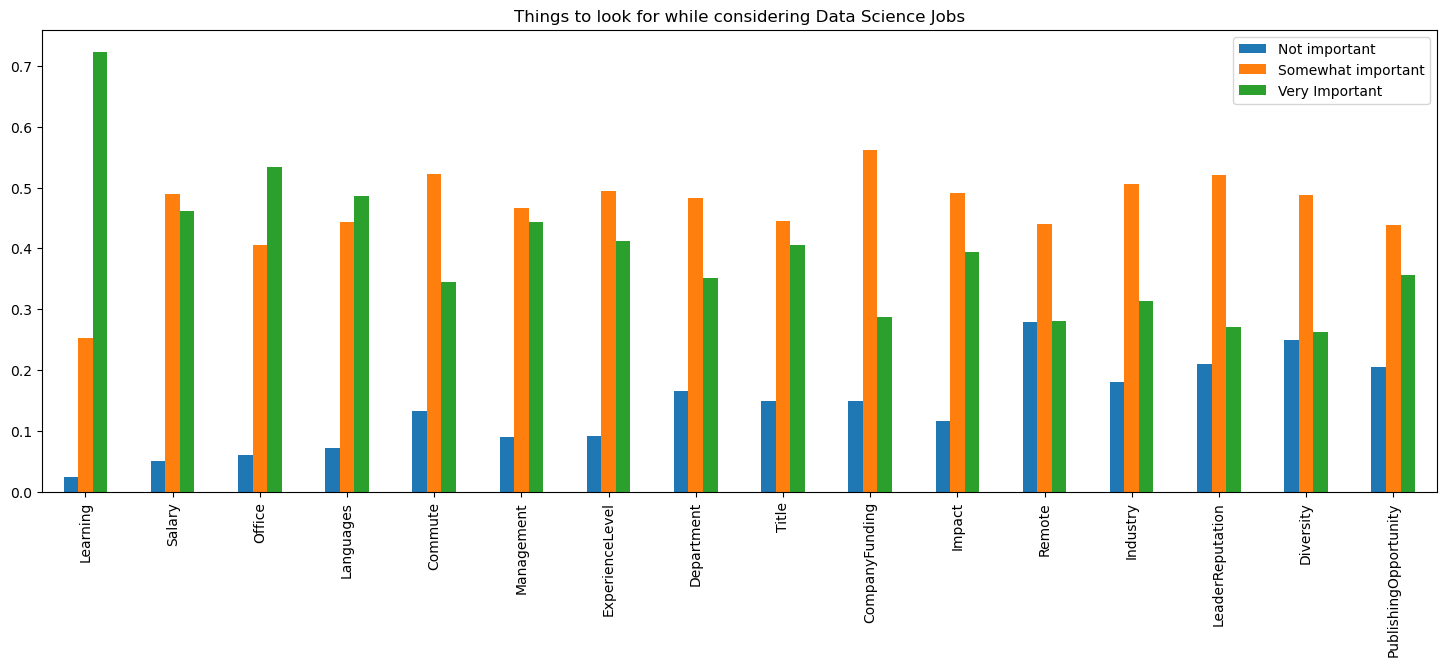

In [212]:
jfdf.plot(kind='bar', figsize = (18,6), title= 'Things to look for while considering Data Science Jobs')
plt.show()

### Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

<AxesSubplot:xlabel='count', ylabel='UniversityImportance'>

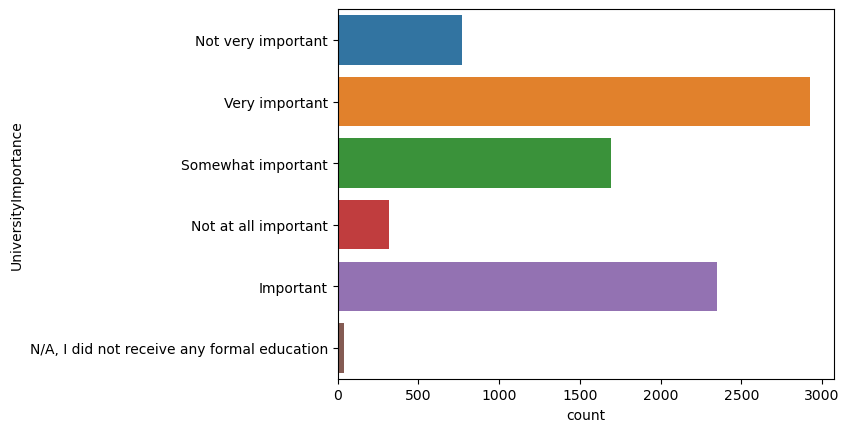

In [213]:
sns.countplot(y='UniversityImportance', data = mcq)

In [215]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(mcq[(mcq['Age'].notnull()) & (mcq['UniversityImportance'] == uni)]['Age'])
                        
group_labels = top_uni.index
                        
fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist = False)
py.iplot(fig, filename = 'University Impoprtance by Age')

마치 연령대 그래프를 그려본 것과 같은 형태의 그래프이다. 20~30대는 대학 학위가 매우 중요하다고 생각하며, 연령대가 높은 응답자들은 그다지 중요하지 않다고 응답했다. 300명 미만의 응답자만이 학위가 중요하지 않다고 생각한다.

대부분의 응답자가 석사와 박사인 것을 고려대봤을 때, 이는 자연스러운 응답이다.

### Q13. 어디에서부터 데이터 사이언스를 시작해야 할까요?

In [216]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

<AxesSubplot:xlabel='count', ylabel='FirstTrainingSelect'>

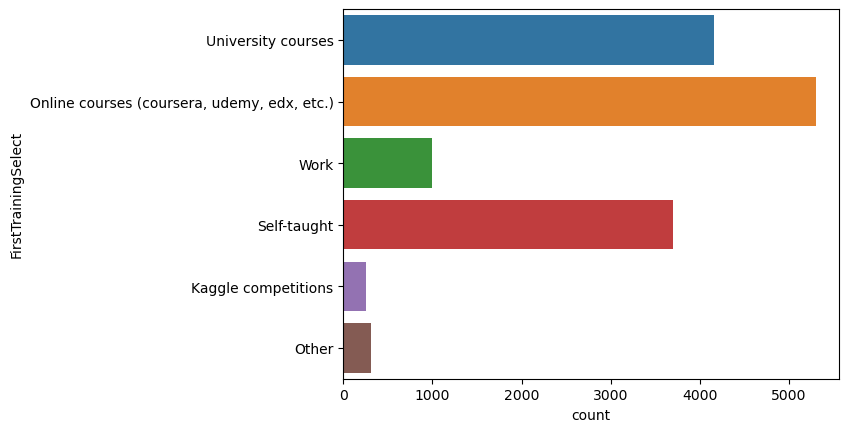

In [217]:
sns.countplot(y = mcq['FirstTrainingSelect'], data = mcq)

대부분의 응답자가 학사 학위 이상으로 대학 교육에 대한 중요성을 부여했지만, 가장 많은 응답자가 온라인 코스를 통한 데이터 사이언스를 공부했음을 확인할 수 있었다. 개인프로젝트를 해보는 것으로 공부를 시작한다는 응답자도 세 번째로 많았다.

### Q14. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

<AxesSubplot:xlabel='count', ylabel='ProveKnowledgeSelect'>

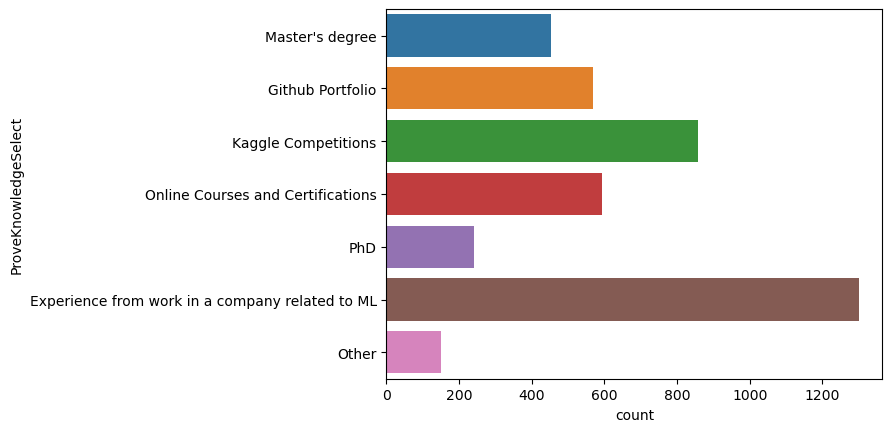

In [218]:
sns.countplot(y = mcq['ProveKnowledgeSelect'], data = mcq)

### Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

In [219]:
# 설문 내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [220]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

<AxesSubplot:xlabel='count', ylabel='AlgorithmUnderstandingLevel'>

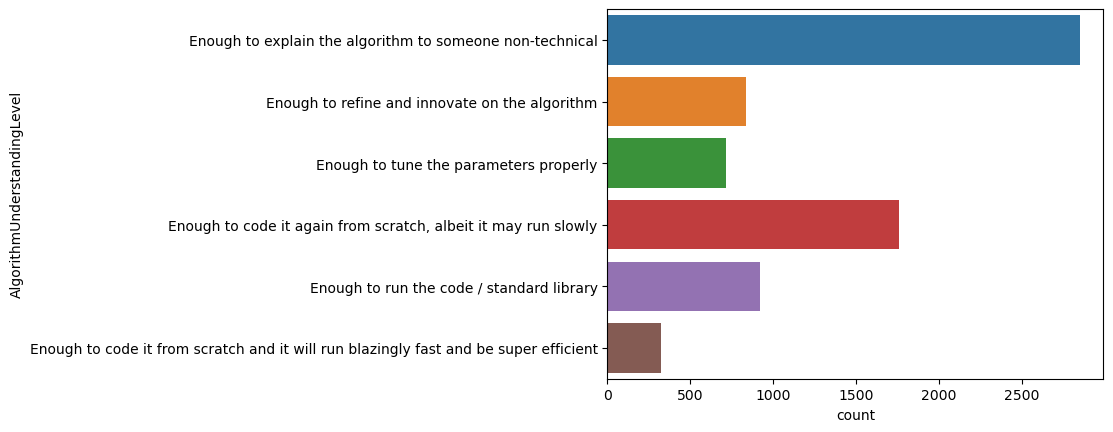

In [221]:
sns.countplot(y = 'AlgorithmUnderstandingLevel', data = mcq)

현재 코딩업무를 하는 사람들에게 질문했으며, 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분하다는 응답이 가장 많으며 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는게 중요하다라는 응답이 그 뒤를 잇는다.

### Q16. 어디에서 일을 찾아야 할까요?

In [223]:
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


<AxesSubplot:title={'center':'Best places to look for a Data Science Jobs'}, xlabel='count', ylabel='JobSearchResource'>

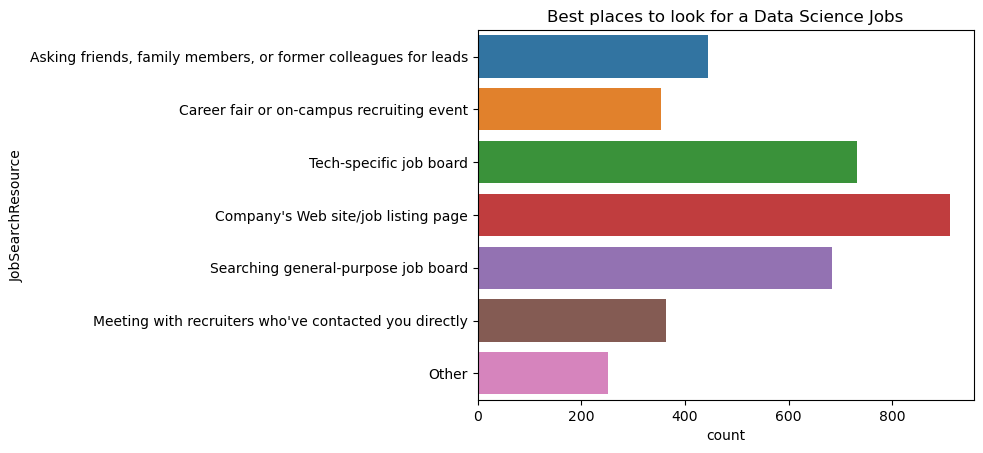

In [228]:
plt.title('Best places to look for a Data Science Jobs')
sns.countplot(y = 'JobSearchResource', data =mcq)

<AxesSubplot:title={'center':'Best place to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

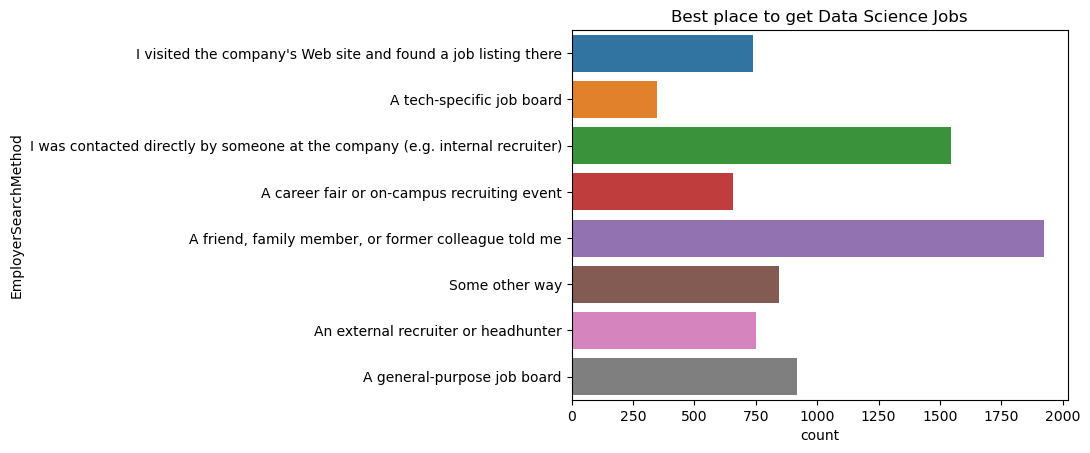

In [227]:
plt.title('Best place to get Data Science Jobs')
sns.countplot(y = 'EmployerSearchMethod', data =mcq)

구직자들은 주로 구직 사이트나 특정/일반 구인 게시판을 통해 채용정보를 찾는 반면, 채용자들은 주로 친구,가족,전 동료들의 추천을 받거나 인터넷 리크루터들을 통해서 구직자들의 정보를 얻는다.

#### 그럼 한국 사람들은 어떨까?

<AxesSubplot:title={'center':'Best places to look for a Data Science Jobs (Korea)'}, xlabel='count', ylabel='JobSearchResource'>

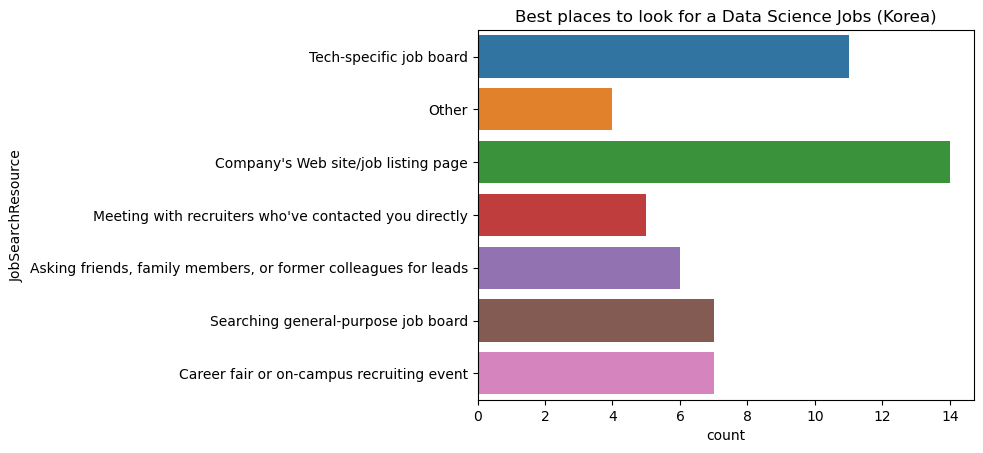

In [229]:
plt.title('Best places to look for a Data Science Jobs (Korea)')
sns.countplot(y = 'JobSearchResource', data = korea)

<AxesSubplot:title={'center':'Best place to get Data Science Jobs (Korea)'}, xlabel='count', ylabel='EmployerSearchMethod'>

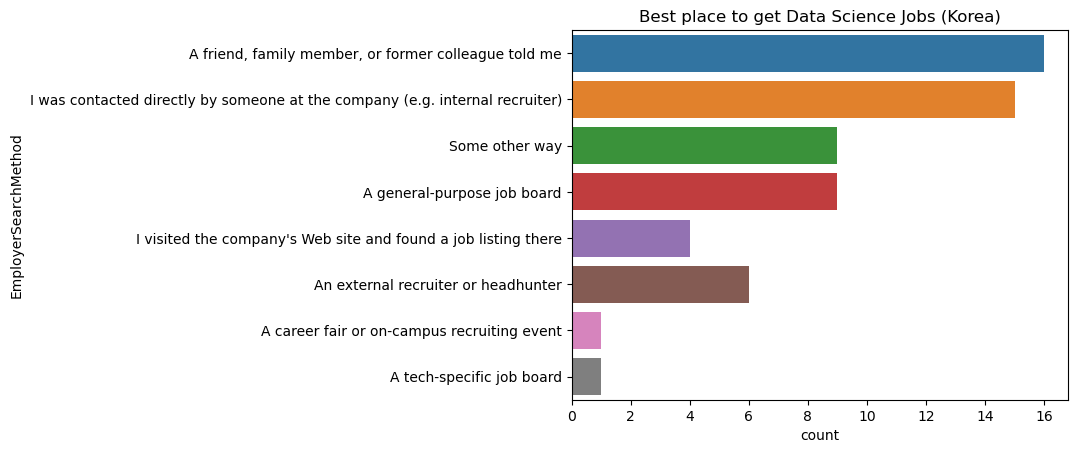

In [230]:
plt.title('Best place to get Data Science Jobs (Korea)')
sns.countplot(y = 'EmployerSearchMethod', data = korea)

한국 사람들(구직자, 채용자)도 전세계 사람들과 같은 경향을 보임을 확인하였다.

## 결론

* 이 설문 결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
* 하지만 Python과 R을 모두 사용하는 사람도 많다.
* 데이터 수집과 정제는 어려운 일이다.
* 인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
* 내년에는 인기있는 기술로는 딥러닝과 텐서플로우가 있다.